<h1 style="color:rgb(0,120,170)">Assignment 5: ICA</h1>

*This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.*

The cumulant-generating function $K_X(t)$ of a random variable $X$ is defined as 
the natural logarithm of the moment-generating function
\begin{equation}
  \newcommand\E{\operatorname{\mathbb{E}}}
  \newcommand\dif{\mathrm{d}}
  K_X(t) = \log \E\left[e^{tX}\right]. 
\end{equation}
Let $\kappa_n(X) = K_X^{(n)}(0)$ the $n$-th derivative of $K_X(t)$ evaluated at $t=0$, 
then the Maclaurin series is 
\begin{equation}
  K_X(t) = \sum_{n=1}^\infty \kappa_n(X) \frac{t^n}{n!}. 
\end{equation}

<h2 style="color:rgb(0,120,170)">Task 1 (20 Points)</h2>
Show that if the random variables $X$ and $Y$ are independent then 
$\kappa_n(X+Y) = \kappa_n(X) + \kappa_n(Y)$ and $\kappa_n(\alpha X) = \alpha^n \kappa_n(X)$
holds. 

########## YOUR SOLUTION HERE ##########

We want to prove the indipendent property and scaling property of our variables.

Independence: For independent random variables X and Y, the moment-generating function of their sum X+Y is the product of their individual moment-generating functions.

$ K_n(X + Y)  = M_{X+Y}(t) $

$ M_{X+Y}(t) = M_X(t) \cdot M_Y(t) = \log(M_X(t) \cdot M_Y(t)) = \log(M_X(t)) + \log(M_Y(t))$

$ \log(M_X(t)) = K_n(X) $ then

$ \log(M_X(t)) + \log(M_Y(t)) = K_n(X) + K_n(Y) $



Scalability: Differentiating n times with respect to t for t=0

$ K_n(\alpha X) = log(M_X(\alpha t)) = \alpha^n log(M_X(t)) = \alpha^n K_n(t)$


<h2 style="color:rgb(0,120,170)">Task 2 (20 Points)</h2>

Show that the first four cumulants of a centered random variable $X$, i.e. $\E[X] = 0$, are 
  \begin{equation}
    \kappa_1 = 0,\quad\kappa_2 = \E[X^2],\quad\kappa_3 = \E[X^3],\quad\text{and}\quad\kappa_4 = \E[X^4] - 3(\E[X^2])^2,
  \end{equation}
respectively. *Hint:* Combine the Taylor expansions $\E[e^{tX}] = \sum_{n=0}^\infty \E[X^n]\frac{t^n}{n!}$ and $\log(1 + a) = \sum_{n=1}^\infty a^n \frac{(-1)^{n+1}}{n}$ and drop all terms of order higher than 4. 

########## YOUR SOLUTION HERE ##########

<h2 style="color:rgb(0,120,170)">Task 3 (20 Points)</h2>

Consider a standard normal random variable $X \sim p(x) = \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}}$. Show that $\E[X] = 0$ and $\E[X^n] = (n-1) \E[X^{n-2}]$ for $n \geq 2$ and use this to determine the third and fourth cumulants of $X$. *Hint:* Use the fact that $\int f'(x) e^{f(x)} \dif x = e^{f(x)}$. 

########## YOUR SOLUTION HERE ##########

<h2 style="color:rgb(0,120,170)">Task 4 (20 Points)</h2>

Compare PCA and ICA at the example of the `cifar-10.npy` dataset. Load the dataset, perform PCA and ICA using the implementations of the `sklearn.decomposition` package with 100 components each. Then visualize the components extracted by the two methods using the provided functions `show_image` and `scale`. What differences do you observe and how do they relate to the properties of PCA and ICA? 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA, FastICA

def scale(s, a=0, b=1):
    return (b - a) * (s - s.min()) / (s.max() - s.min()) + a

def show_image(img):
    plt.imshow(img.reshape(3, 32, 32).transpose((1, 2, 0)))

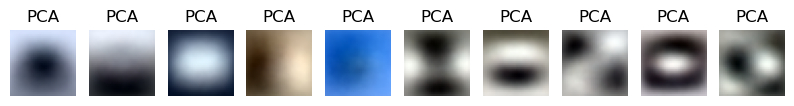

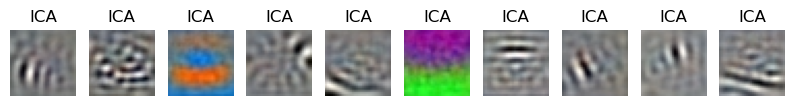

PCA and ICA extract different information from dataset PCA shows global features of data, ICA shows some localized patterns. PCA tends to capture correlated variations in the data, while ICA focuses on capturing statistically independent sources PCA components are orthogonal to each other


In [4]:
########## YOUR SOLUTION HERE ##########

import numpy as np
from sklearn.decomposition import PCA, FastICA

# Load the CIFAR-10 dataset
X = np.load('cifar-10.npy')

# Perform PCA with 100 components
pca = PCA(n_components=100)
X_pca = pca.fit_transform(X)

# Perform ICA with 100 components
ica = FastICA(n_components=100)
X_ica = ica.fit_transform(X)

# Visualize PCA components
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 10, i + 1)
    show_image(scale(pca.components_[i]))
    plt.axis('off')
    plt.title('PCA'.format(i + 1))

# Visualize ICA components
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 10, i + 1)
    show_image(scale(ica.components_[i]))
    plt.axis('off')
    plt.title('ICA'.format(i + 1))

plt.show()

print("PCA and ICA extract different information from dataset", 
      "PCA shows global features of data, ICA shows some localized patterns.", 
      "PCA tends to capture correlated variations in the data, while ICA focuses on capturing statistically independent sources",
      "PCA components are orthogonal to each other")

<h2 style="color:rgb(0,120,170)">Task 5 (20 Points)</h2>

Consider the cocktail party problem. Read the left channel of the files `birds.wav`, `ocean.wav`, `frogs.wav` using the `scipy.io.wavfile` package. Then construct a full-rank $3 \times 3$ mixing matrix and produce 3 different mixings of those signals. You can listen to them using the `sounddevice` package. Finally, use `FastICA` from the `sklearn.decomposition` package to recover the original sources. Listen to the recovered sources and compare them to the originals to check if ICA was successful. *Hint:* Scale the signals to $[-1,1]$ before playing them. 

In [28]:
import scipy.io.wavfile
import sounddevice as sd

########## YOUR SOLUTION HERE ##########

import numpy as np
from sklearn.decomposition import FastICA

# Read the left channel of the WAV files
sample_rate, birds = scipy.io.wavfile.read('birds.wav')
_, ocean = scipy.io.wavfile.read('ocean.wav')
_, frogs = scipy.io.wavfile.read('frogs.wav')

# Ensure all signals have the same length
min_length = min(len(birds), len(ocean), len(frogs))
birds = birds[:min_length, 0]
ocean = ocean[:min_length, 0]
frogs = frogs[:min_length, 0]

# Construct a full-rank 3x3 mixing matrix
mixing_matrix = np.random.rand(3, 3)

# Produce 3 different mixings of the signals
mixed_signals = np.dot(np.column_stack((birds, ocean, frogs)), mixing_matrix)

# Scale the mixed signals to [-1, 1]
mixed_signals_scaled = np.interp(mixed_signals, (mixed_signals.min(), mixed_signals.max()), (-1, 1))

# Use FastICA to recover the original sources
ica = FastICA(n_components=3)
recovered_sources = ica.fit_transform(mixed_signals_scaled)

# Scale the recovered sources to [-1, 1]
recovered_sources_scaled = np.interp(recovered_sources, (recovered_sources.min(), recovered_sources.max()), (-1, 1))


# Listen to the original signals
#sd.play(birds, sample_rate)
#sd.play(ocean, sample_rate)
#sd.play(frogs, sample_rate)

# Listen to the mixed signals
#sd.play(mixed_signals[:, 0], sample_rate)
#sd.play(mixed_signals[:, 1], sample_rate)
#sd.play(mixed_signals[:, 2], sample_rate)

# Listen to the recovered sources
#sd.play(recovered_sources_scaled[:, 0],sample_rate)
#sd.play(recovered_sources_scaled[:, 1],sample_rate)
#sd.play(recovered_sources_scaled[:, 2],sample_rate)

print("We have succesfully merged all signals into one signal and then proved that FastICA , signal decomposition, was successfull.")

We have succesfully merged all signals into one signal and then proved that FastICA , signal decomposition, was successfull.
